# Boston:

In [1]:
import warnings
warnings.filterwarnings(action='ignore',category=FutureWarning)
warnings.filterwarnings(action='ignore',category=DeprecationWarning)

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [2]:
import pandas as pd
a=pd.read_csv('Boston.csv')
a.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
print('shape : ',a.shape)
a.info()

shape :  (506, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [4]:
a.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
a.isnull().any()

Unnamed: 0    False
crim          False
zn            False
indus         False
chas          False
nox           False
rm            False
age           False
dis           False
rad           False
tax           False
ptratio       False
black         False
lstat         False
medv          False
dtype: bool

In [6]:
from sklearn.decomposition import PCA

In [7]:
pc=PCA(n_components=10)

In [8]:
pc

PCA(n_components=10)

In [9]:
model=pc.fit(a)

In [10]:
#model=pc.fit_transform(a)

In [11]:
model.explained_variance_ratio_

array([7.31274396e-01, 1.48553121e-01, 9.99688550e-02, 1.29715526e-02,
       4.46084119e-03, 1.28035996e-03, 7.71568480e-04, 2.83107059e-04,
       2.25512401e-04, 1.42366968e-04])

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='Density'>

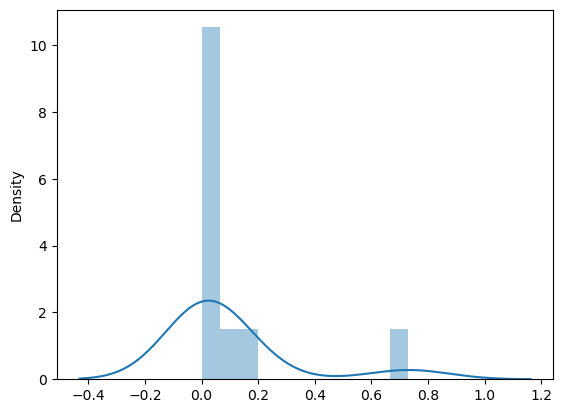

In [13]:
sns.distplot(model.explained_variance_ratio_)

(array([7., 1., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([1.42366968e-04, 7.32555698e-02, 1.46368773e-01, 2.19481976e-01,
        2.92595178e-01, 3.65708381e-01, 4.38821584e-01, 5.11934787e-01,
        5.85047990e-01, 6.58161193e-01, 7.31274396e-01]),
 <BarContainer object of 10 artists>)

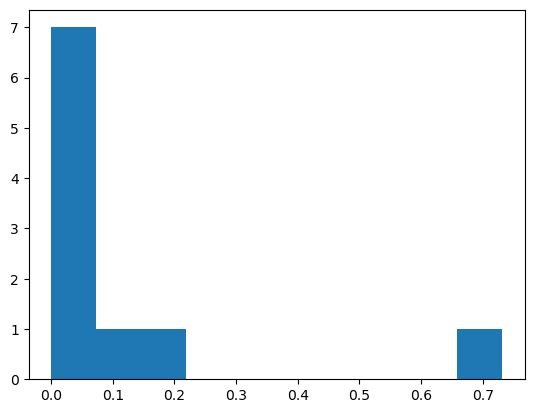

In [14]:
plt.hist(model.explained_variance_ratio_)

In [15]:
import seaborn as sns
a.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [16]:
categorical_var=a.drop(['crim', 'zn', 'indus',  'nox', 'rm', 'age', 'dis',  'tax',
       'ptratio', 'black', 'lstat'],axis=1)
continuous_var=a.drop([ 'chas', 'rad'],axis=1)

In [ ]:
for i in categorical_var:
    if i != 'medv':
        sns.catplot(x=i,data=categorical_var,kind='count')
        sns.catplot(x=i,y='medv',data=categorical_var,kind='box')

In [ ]:
import matplotlib.pyplot as plt
for i in continuous_var:
    if i != 'medv':
        
        sns.distplot(continuous_var[i])
        plt.show()

In [ ]:
for i in continuous_var:
    if i != 'medv':
        sns.scatterplot(x=i,y='medv',data=continuous_var)
        
        plt.show()

In [ ]:
#linear regression:

In [ ]:
#corelation:
a_cor=a.corr()
a_cor

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(a_cor,annot=True)

In [ ]:
x=a.drop(['medv'],axis=1)
y=a['medv']

In [ ]:
x_s=StandardScaler()


In [ ]:
x1=x_s.fit_transform(x)
x1=pd.DataFrame(x1)
x1.columns=x.columns

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=12)

In [ ]:
lm=cross_val_score(LinearRegression(),x_train,y_train,cv=5)
rr=cross_val_score(Ridge(),x_train,y_train,cv=5)
lr=cross_val_score(Lasso(),x_train,y_train,cv=5)
gb=cross_val_score(GradientBoostingRegressor(),x_train,y_train,cv=5)
xgb=cross_val_score(XGBRegressor(),x_train,y_train,cv=5)
#pr=cross_val_score(PolynomialFeatures(),x_train,y_train,cv=5)

In [ ]:
print("cross validation score:")
print("linear regression :",lm,lm.mean(),lm.std())
print("ridge regression :",rr,rr.mean(),rr.std())
print("lasso regression :",lr,lr.mean(),lr.std())
print("gradient boosting :",gb,gb.mean(),gb.std())
print("XG boost :",xgb,xgb.mean(),xgb.std())


In [ ]:
#Linear regression:
lm=LinearRegression()

In [ ]:
model=lm.fit(x_train,y_train)
pred_test=model.predict(x_test)
print("coeff -",model.coef_)
print("intercept -",model.intercept_)

In [ ]:
print("TEST DATA:")
print("accuracy - ",r2_score(y_pred=pred_test,y_true=y_test)*100,"%")
print("error - ",mean_squared_error(y_pred=pred_test,y_true=y_test))

In [ ]:
#ridge regression:
rr=Ridge()

In [ ]:
#grid search value:
param={"alpha":[10,1,0.1,0.01,0.001,0.0001,0.00001]}
grid=GridSearchCV(estimator=rr,param_grid=param,cv=3,scoring='neg_mean_squared_error')
grid.fit(x_train,y_train)
print(grid.best_params_)
pd.DataFrame(grid.cv_results_)

In [ ]:
rr=Ridge(alpha=0.00001)
model=rr.fit(x_train,y_train)
pred_test=model.predict(x_test)


In [ ]:
print("TEST DATA:")
print("accuracy - ",r2_score(y_pred=pred_test,y_true=y_test)*100,"%")
print("error - ",mean_squared_error(y_pred=pred_test,y_true=y_test))

In [ ]:
#polynomial regression:
pf=PolynomialFeatures(degree=2)

In [ ]:
model=pf.fit_transform(x_train)
model_test=pf.fit_transform(x_test)

In [ ]:
model1=lm.fit(model,y_train)
pred=model1.predict(model_test)

In [ ]:
print("TEST DATA:")
print("accuracy - ",r2_score(y_pred=pred,y_true=y_test)*100,"%")
print("error - ",mean_squared_error(y_pred=pred,y_true=y_test))

In [ ]:
#Gradient boosting:
gb=GradientBoostingRegressor()
gb

In [ ]:
param={'alpha':[0.9,0.1,0.01,0.001,0.0001,0.00001],'max_depth':[2,3,5,7,9,10,15,20]}
grid=GridSearchCV(estimator=gb,param_grid=param,cv=3,scoring='neg_mean_squared_error')
grid.fit(x_train,y_train)
print(grid.best_params_)
pd.DataFrame(grid.cv_results_)

In [ ]:
gb=GradientBoostingRegressor(alpha=0.01,max_depth=3)
model=gb.fit(x_train,y_train)
pred_test=model.predict(x_test)

In [ ]:
print("TEST DATA:")
print("accuracy - ",r2_score(y_pred=pred_test,y_true=y_test)*100,"%")
print("error - ",mean_squared_error(y_pred=pred_test,y_true=y_test))

In [ ]:
#xgboost:
xgb=XGBRegressor()
xgb

In [ ]:
param={'base_score':[0.9,0.5,0.1,0.01,0.001,0.0001,0.00001],'max_depth':[2,3,5,7,9,10,15,20]}
grid=GridSearchCV(estimator=xgb,param_grid=param,cv=3,scoring='neg_mean_squared_error')
grid.fit(x_train,y_train)
print(grid.best_params_)


In [ ]:
xgb=XGBRegressor(base_score=0.01,max_depth=5)

In [ ]:
model=xgb.fit(x_train,y_train)
pred_test=model.predict(x_test)

In [ ]:
print("TEST DATA:")
print("accuracy - ",r2_score(y_pred=pred_test,y_true=y_test)*100,"%")
print("error - ",mean_squared_error(y_pred=pred_test,y_true=y_test))

In [ ]:
pd.DataFrame(pred_test)